# Top 50 matplotlib Visualizations - The Master Plots
### Mostly From: [Machine Learning Plus](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python)  
  
  
  
# Not Finished 8/2/20 -MDE

# To-do: 
- Combine with Seaborn-Tutorial notebook - similar concepts  
- Issues with #05 - size parameter
- Create an example for #10 - FacetGrid
- Issues with #25 - not completed
- Continue with #26 - #51
- Change title: 50+ now

<a id="Contents"></a>
## Contents

### [Setup](#Prelim-Setup)  
### Correlation  

1. [Scatter Plot](#01)  
2. [Bubble Plot with Encircling](#02)  
3. [Scatter Plot with Line of Best Fit](#03)  
4. [Jittering with Stripplot](#04)  
5. [Counts Plot](#05)  
6. [Marginal Histogram](#06)  
7. [Marginal Boxplot](#07)  
8. [Correlogram](#08)  
9. [Pairwise Plot](#09)  
10. [FacetGrid Plot](#10)

### Deviation

11. [Diverging Bars](#11)
12. [Diverging Texts](#12)
13. [Diverging Dot Plot](#13)
14. [Diverging Lollipop Chart with Markers](#14)
15. [Area Chart](#15)

### Ranking
16. [Ordered Bar Chart](#16)
17. [Lollipop Chart](#17)
18. [Dot Plot](#18)
19. [Slope Chart](#19)
20. [Dumbbell Plot](#20)  

### Distribution
21. [Histogram for Continuous Variable](#21)
22. [Histogram for Categorical Variable](#22)
23. [Density Plot](#23)
24. [Density Cruves with Histogram](#24)
25. [Joy Plot](#25)

---

# *******Continue Here********
26. [Distributed Dot Plot](#26) (needs fixed)
---


27. [Box Plot](#27)
28. [Dot + Box Plot](#28)
29. [Violin Plot](#29)
30. [Population Pyramid](#30)
31. [Categorical Plots](#31)

### Composition
32. [Waffle Chart](#32)
33. [Pie Chart](#33)
34. [Treemap](#34)
35. [Bar Chart](#35)

### Change
36. [Time Series Plot](#36)
37. [Time Series with Peaks and Troughs Annotated](#37)
38. [Autocorrelation Plot](#38)
39. [Cross Correlation Plot](#39)
40. [Time Series Decomposition Plot](#40)
41. [Multiple Time Series](#41)
42. [Plotting with different scales using secondary Y axis](#42)
43. [Time Series with Error Bands](#43)
44. [Stacked Area Chart](#44)
45. [Area Chart Unstacked](#45)
46. [Calendar Heat Map](#46)
47. [Seasonal Plot](#47)

### Groups
48. [Dendrogram](#48)
49. [Cluster Plot](#49)
50. [Andrews Curve](#50)
51. [Parallel Coordinates](#51)  
  



---
<a id="Prelim-Setup"></a>

# Setup

In [2]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.2.2
0.10.1


[Return to Top](#Contents)
# Correlation Plots
The plots under correlation are used to visualize the relationship between 2 or more variables.  That is, how does one variable change with respect to another.

<a id="01"></a>
## 1. Scatter Plot

Scatterplot is a classic and fundamental plot used to study the relationship between two variables. If you have multiple groups in your data you may want to visualize each group in a different color.  In `matplotlib`, you can conveniently do this using `plt.scatterplot()`.

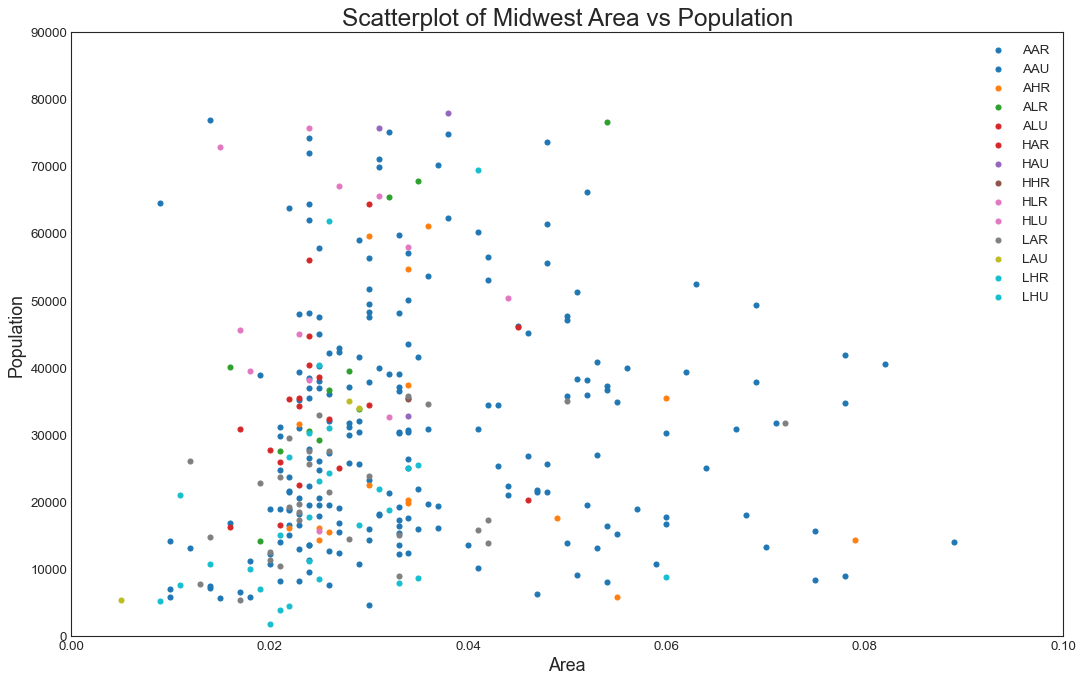

In [11]:
# Import dataset
#midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
midwest = pd.read_csv("midwest_filter.csv")

# Prepare Data
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal',
                data=midwest.loc[midwest.category==category, :],
                s=20, color=colors[i], label=str(category))
    
# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
             xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)
plt.show()

[Return to Top](#Contents)  
<a id='02'></a>
## 2. Bubble Plot with Encircling

Sometimes you want to show a gorup of points within a boundary to emphasize their importance.  In this example, you get the records from the dataframe that should be encircled and pass it to the `encircle()` described in the code below.

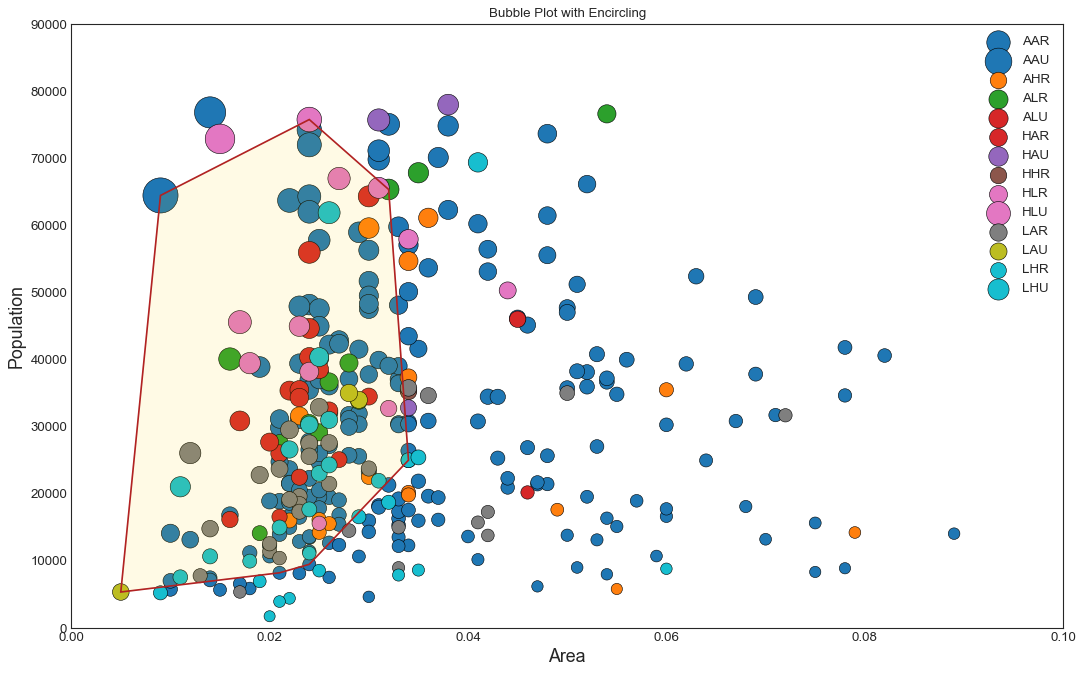

In [17]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
#midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
midwest = pd.read_csv('midwest_filter.csv')

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16,10), dpi=80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], 
                s='dot_size', 
                color=colors[i], 
                label=str(category), 
                edgecolors='black', 
                linewidths=0.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)
        
# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]

# Draw polygon surrounding vertices
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec='k', fc='gold', alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec='firebrick', fc='none', linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=12)
plt.legend(fontsize=12)
plt.show()

A couple of examples from the original source on [stackoverflow.com](https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot):

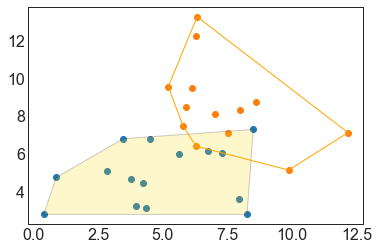

In [18]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
from scipy.spatial import ConvexHull

x1, y1 = np.random.normal(loc=5, scale=2, size=(2,15))
x2, y2 = np.random.normal(loc=8, scale=2.5, size=(2,13))

plt.scatter(x1, y1)
plt.scatter(x2, y2)

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

encircle(x1, y1, ec="k", fc="gold", alpha=0.2)
encircle(x2, y2, ec="orange", fc="none")

plt.show()

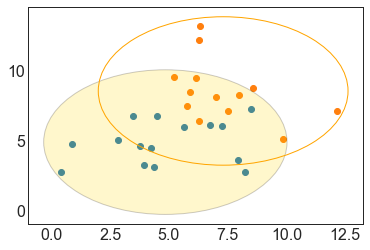

In [19]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
from scipy.spatial import ConvexHull

x1, y1 = np.random.normal(loc=5, scale=2, size=(2,15))
x2, y2 = np.random.normal(loc=8, scale=2.5, size=(2,13))

plt.scatter(x1, y1)
plt.scatter(x2, y2)


def encircle2(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    mean = np.mean(p, axis=0)
    d = p-mean
    r = np.max(np.sqrt(d[:,0]**2+d[:,1]**2 ))
    circ = plt.Circle(mean, radius=1.05*r,**kw)
    ax.add_patch(circ)

encircle2(x1, y1, ec="k", fc="gold", alpha=0.2)
encircle2(x2, y2, ec="orange", fc="none")

plt.gca().relim()
plt.gca().autoscale_view()
plt.show()

[Return to Top](#Contents)  
<a id='03'></a>
## 3. Scatter plot with linear regression line of best fit

If you want to understand how two variables change with respect to each other, th line of best fit is the way to go.  The below plot shows how the line of best fit differs amongst various groups in the dat.  To disable the groupings and to just draw one line-of-best-fit for the entire dataset, remove the `hue='cyl'` parameter from teh `sns.lmplot()` call below.

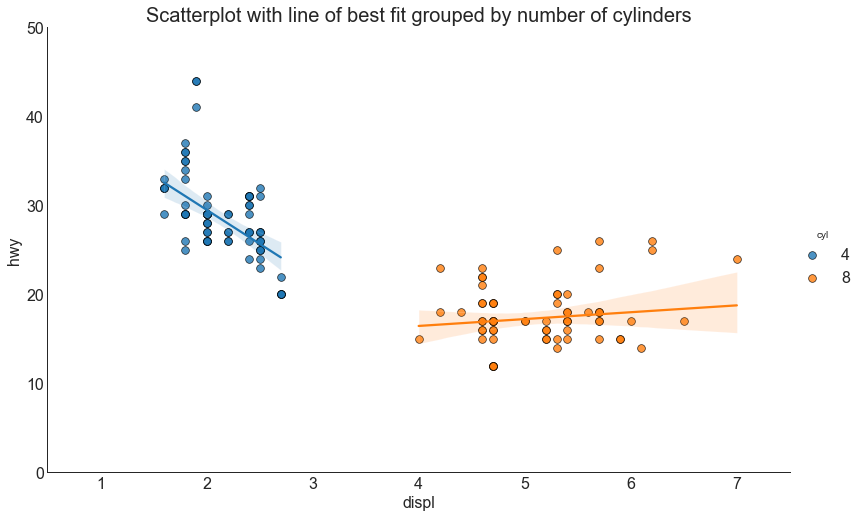

In [33]:
# Import Data
#df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
#df.to_csv("mpg_ggplot2.csv")
df = pd.read_csv("mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select,
                    height=7, aspect=1.6, robust=True, palette='tab10',
                    scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

### Each regression line in its own column
Alternately, you can show the best fit line for each group in its own column.  You can do this by setting the `col=groupingcolumn` parameter inside the `sns.lmplot()`.

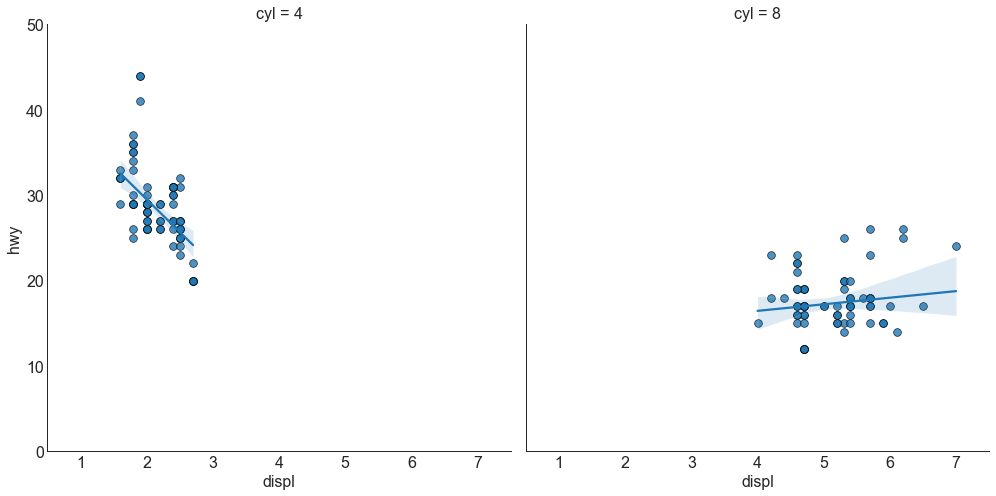

In [49]:
# Import Data
df = pd.read_csv("mpg_ggplot2.csv") #(from above)
df_select = df.loc[df.cyl.isin([4,8]), :]

# Each line in its own column
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy",
                    data=df_select,
                    height=7,
                    robust=True,
                    palette="Set1",
                    col="cyl",
                    scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

[Return to Top](#Contents)  
<a id='04'></a>
## 4. Jittering with stripplot

Often multiple datapoints have exactly the same X and Y values.  As a result, multiple points get plotted over each other and hide.  To avoid this, jitter the points slightly so you can visually see them.  This is convenient to do using Seaborn's `stripplot()`.

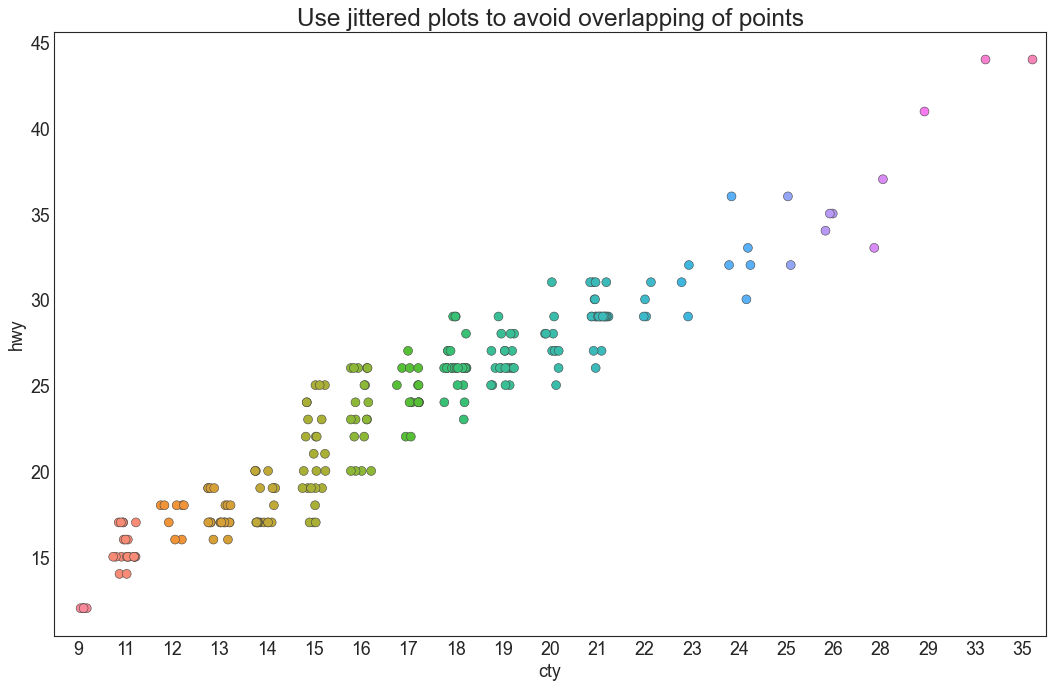

In [50]:
# Import Data
df = pd.read_csv("mpg_ggplot2.csv")

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi=80)
sns.stripplot(df.cty, df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

[Return to Top](#Contents)  
<a id='05'></a>
## 5. Counts Plot - Note! `size=` no longer seems to accept an array -MDE

Another option to avoid the problem of points overlap is to increase the size of the dot depending on how many points lie in that spot.  So, larger the size of the point more is the concentration of points around that.

## Note:
The following example with `size=df_counts.counts*2` doesn't work.  It gives an error that `s must be a scalar array`.
I wasn't able to find a fix.  It appears to be a bug with the stripplot.  The size parameter will take a value, but not an array or list of values.  -MDE

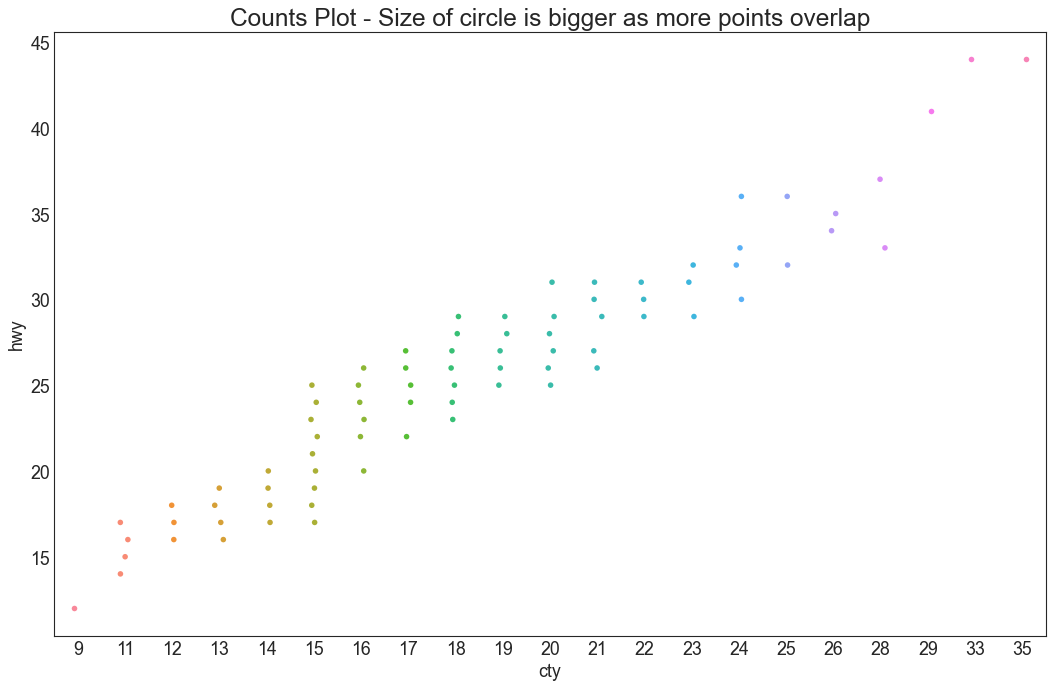

In [109]:
# Import Data
#df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df = pd.read_csv('mpg_ggplot2.csv')
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
#sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)
sns.stripplot(df_counts.cty, df_counts.hwy, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

[Return to Top](#Contents)  
<a id='06'></a>
## 6. Marginal Histogram

Marginal histograms have a histogram along the X and Y axis variables.  This is used to visualize the relationship between the X and Y along with the univariate distribution of the X and the Y individually.  This plot is often used in exploratory data analysis (EDA).

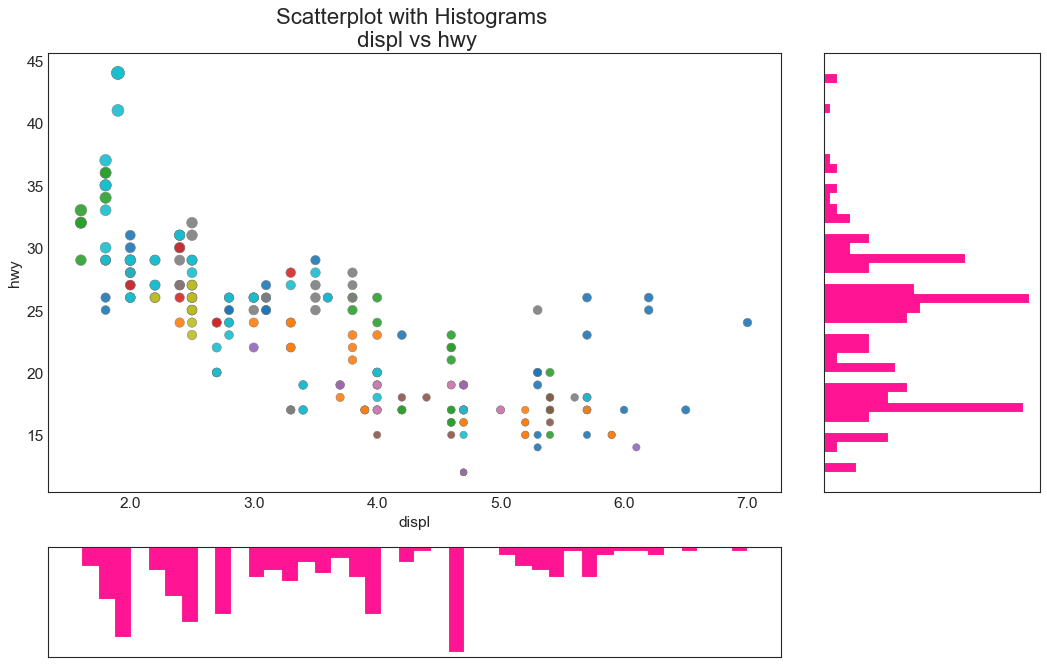

In [147]:
# Import Data
df = pd.read_csv('mpg_ggplot2.csv')

# Create Fig and gridspec
fig = plt.figure(figsize=(16,10), dpi=80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9,
               data=df, cmap='tab10', edgecolors='gray', linewidths=.5)

# Histogram on bottom
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# Histogram on the right
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

[Return to Top](#Contents)  
<a id='07'></a>
## 7. Marginal Boxplot

Marginal boxplot serves a similar purpose as marginal histogram.  However, the boxplot helps to pinpoint the median, 25th and 75th percentiles of the X and the Y.

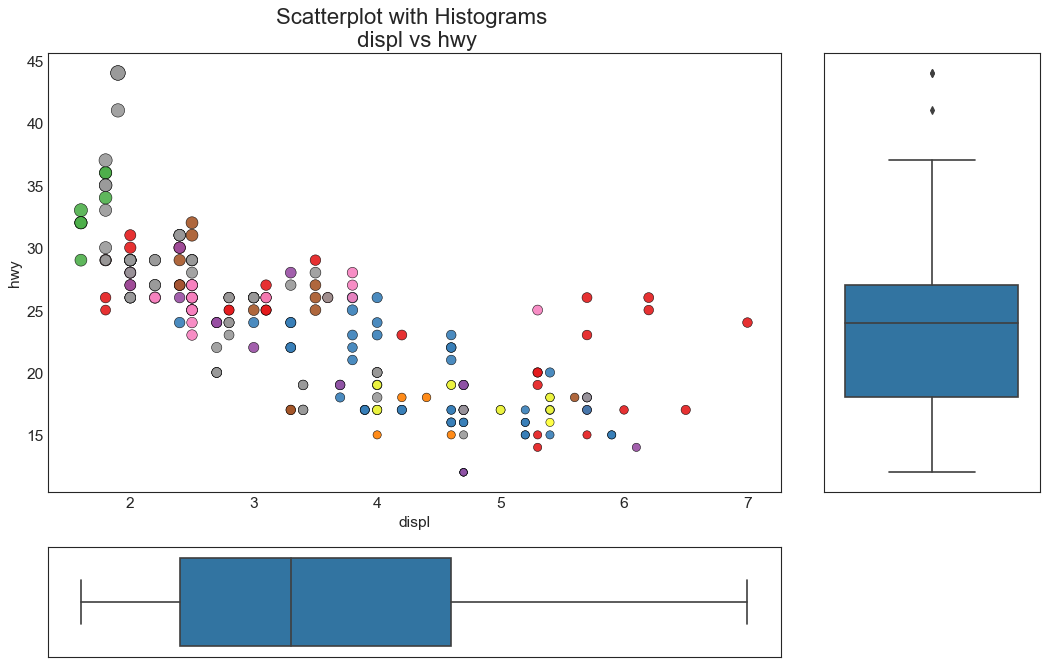

In [149]:
# Import Data
df = pd.read_csv("mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', 
                s=df.cty*5, 
                c=df.manufacturer.astype('category').cat.codes,
                alpha=.9, 
                data=df, 
                cmap="Set1", 
                edgecolors='black', 
                linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)
    
plt.show()

[Return to Top](#Contents)  
<a id='08'></a>
## 8. Correlogram

Correlogram is used to visually see the correlation metric between all possible pairs of numeric variables in a given dataframe (or 2D array).

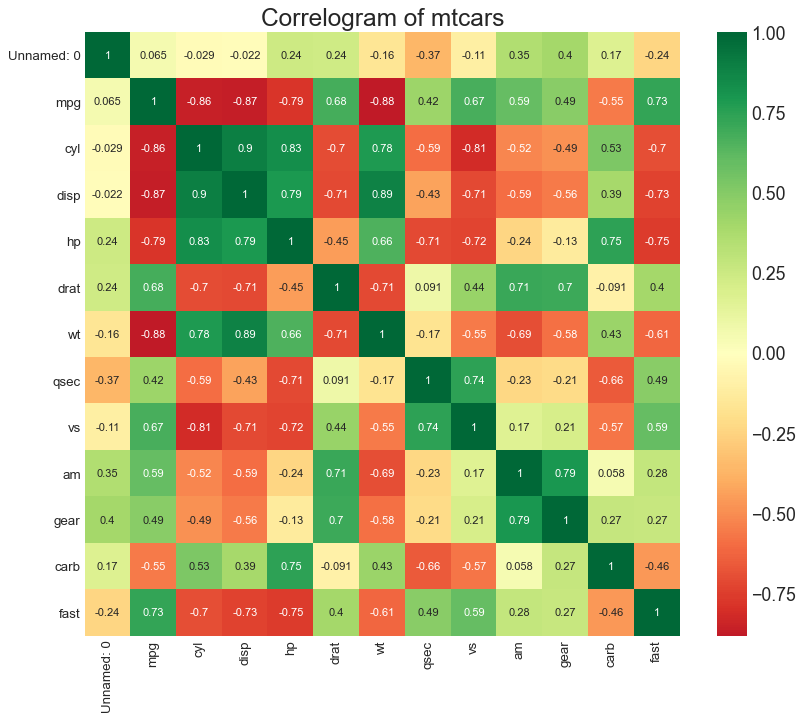

In [155]:
# Import Dataset

# df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mtcars.csv')
# df.to_csv('mtcars.csv')
df = pd.read_csv('mtcars.csv')

# Plot
plt.figure(figsize=(12,10), dpi=80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

[Return to Top](#Contents)  
<a id='09'></a>
## 9. Pairwise Plot

Pairwise plot is a favorite in exploratory analysis to understand the relationship between all possible pairs of numeric variables.  It is a must have tool for bivariate analysis.

<Figure size 800x640 with 0 Axes>

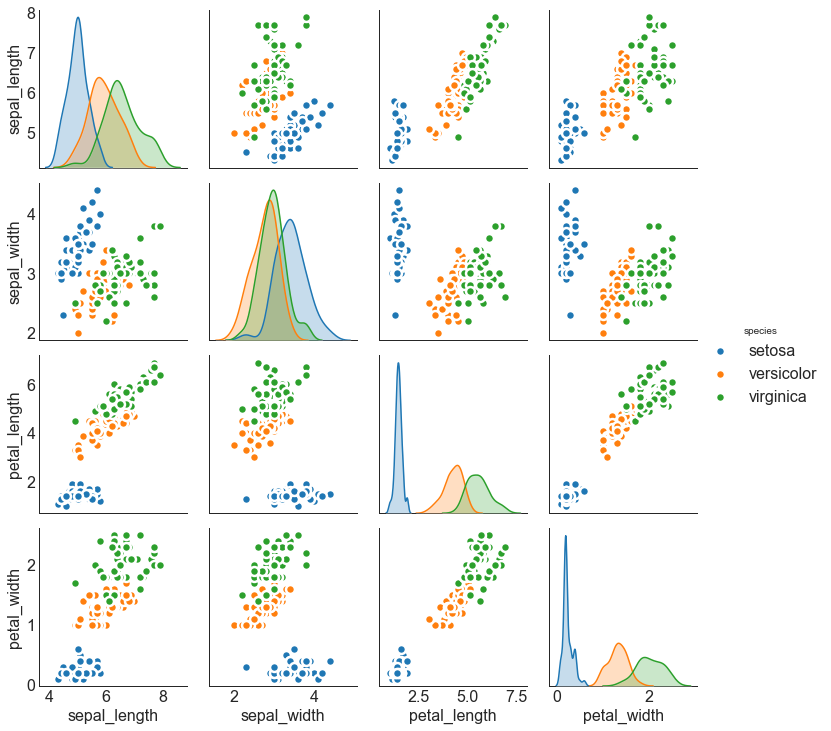

In [157]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi=80)
sns.pairplot(df, kind='scatter', hue='species',
            plot_kws=dict(s=80, edgecolor='white', linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

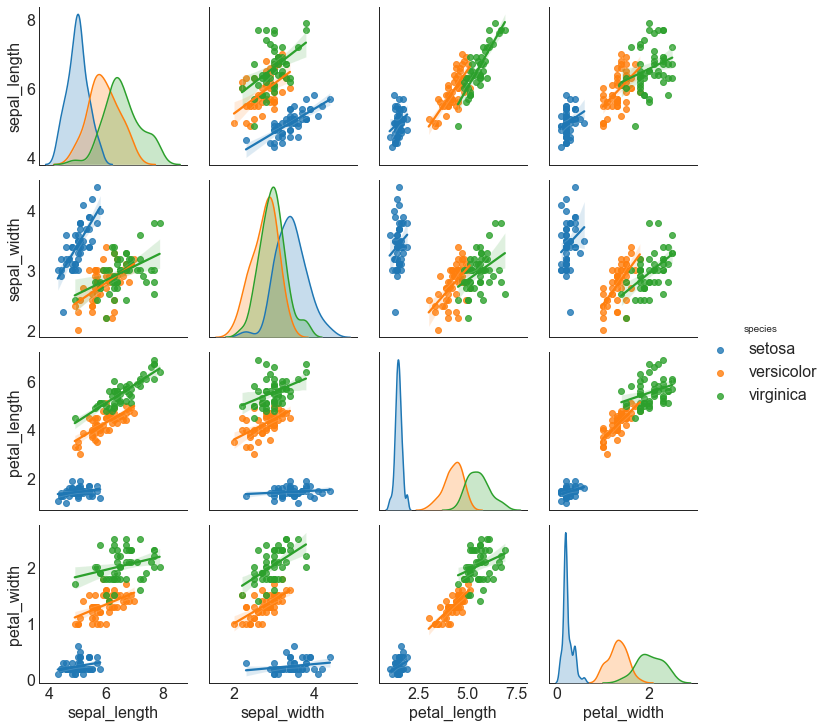

In [159]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()

[Return to Top](#Contents) 
<a id='10'></a>
## 10. FacetGrid Plots

# To-do:
Pick some examples from [here](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)  



[Return to Top](#Contents)  

# Deviation

<a id='11'></a>
## 11. Diverging Bars

If you want to see how the items are varying based on a single metric and visualize the order and amount of this variance, the diverging bars is a great tool.  It helps to quickly differentiate the performance of groups in your data and is quite intuitive and instantly conveys the point.

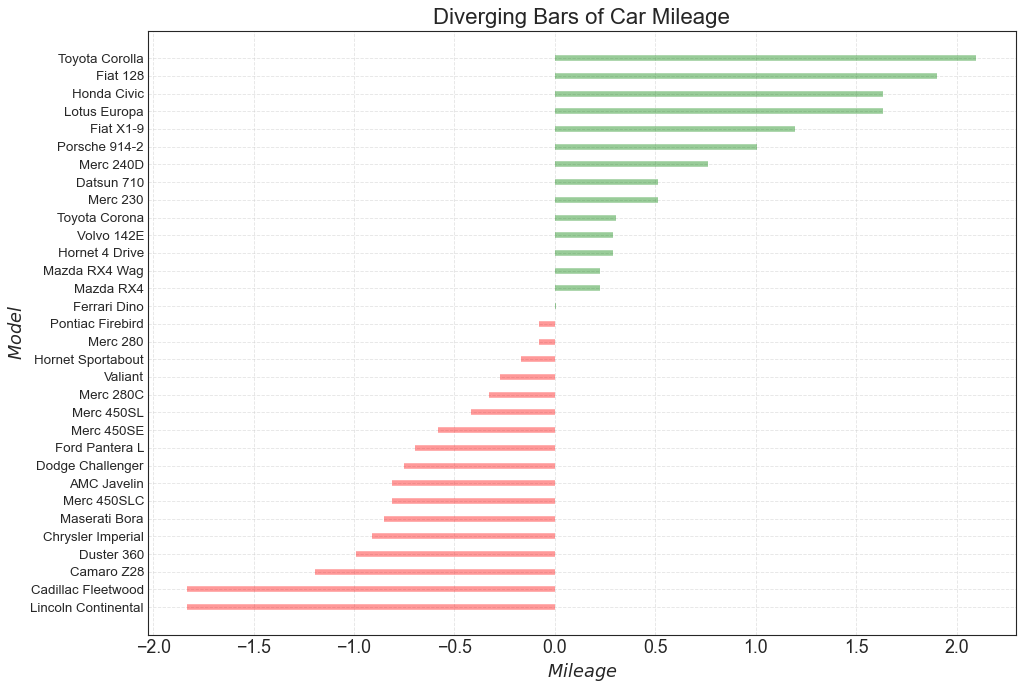

In [163]:
# Prepare Data
#df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df = pd.read_csv('mtcars.csv')

x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

[Return to Top](#Contents)  
<a id='12'></a>
## 12. Diverging Texts

Diverging texts is similar to diverging bars and it is preferred if you want to show the value of each item within the chart in a nice and presentable way.

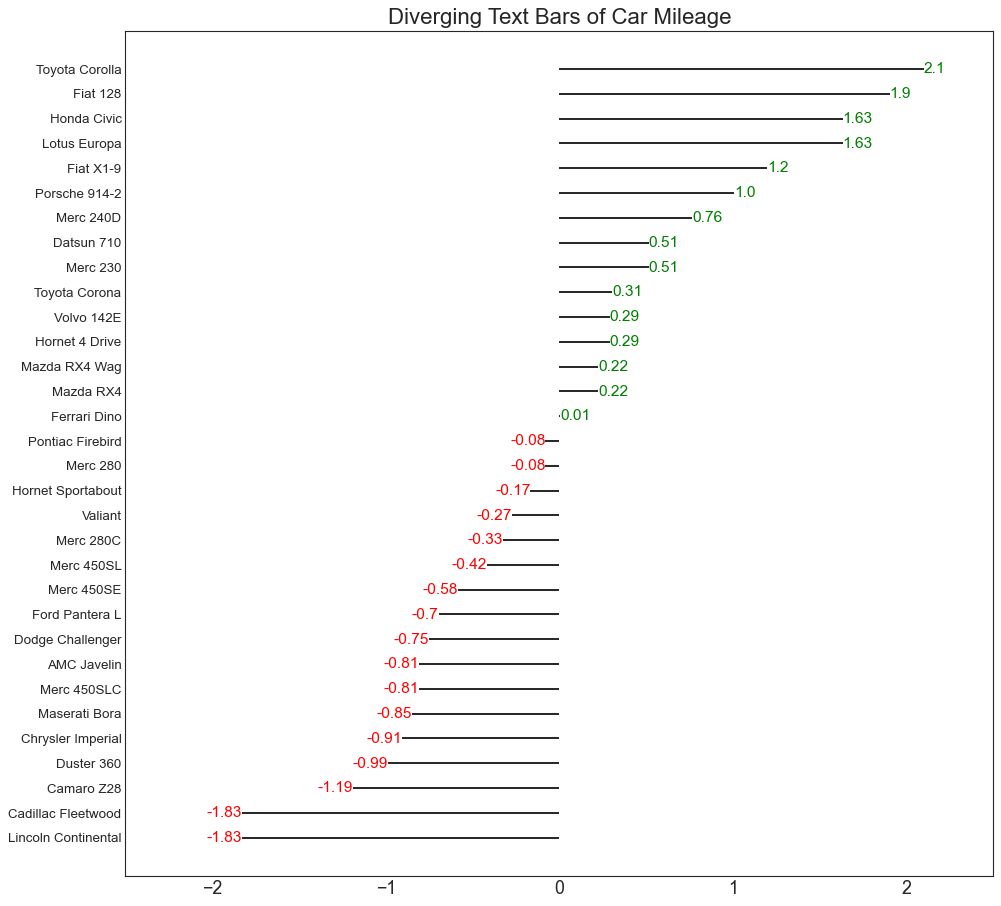

In [167]:
# Prepare Data
df = pd.read_csv('mtcars.csv')

x = df.loc[:, ['mpg']]
df['mpg_z'] = (x-x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw Plot
plt.figure(figsize=(14,14), dpi=80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x,y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left',
                verticalalignment = 'center', fontdict={'color':'red' if x < 0 else 'green',
                                                       'size': 14})
    
# Decorations
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})
plt.xlim(-2.5, 2.5)
plt.show()

[Return to Top](#Contents)  
<a id='13'></a>
## 13. Diverging Dot Plot

Diverging dot plot is also similar to the diverging bars.  However, compared to diverging bars, the absence of the bars reduces the amount of contrast and disparity between the groups.


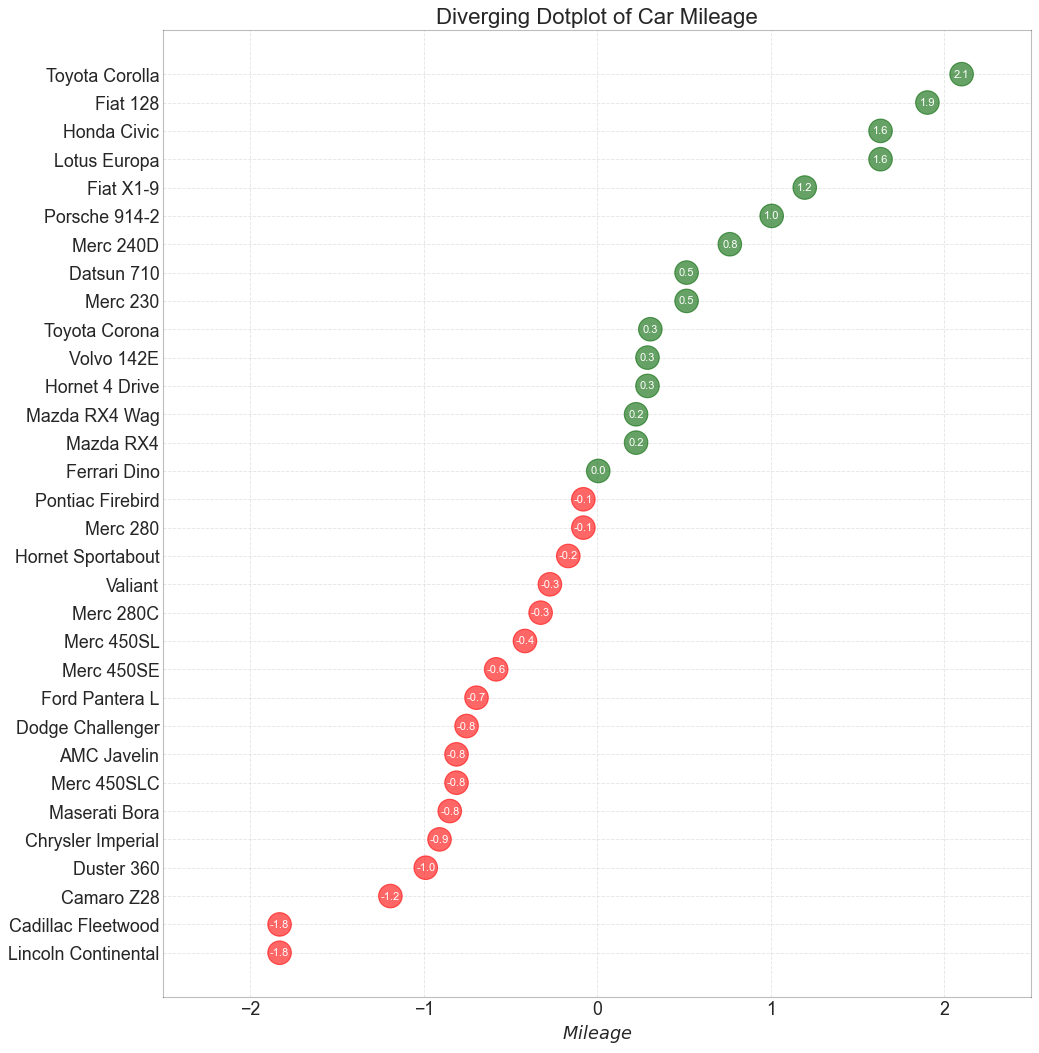

In [169]:
# Prepare Data
df = pd.read_csv('mtcars.csv')

x = df.loc[:, ['mpg']]
df['mpg_z'] = (x-x.mean()) / x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw Plot
plt.figure(figsize=(14,16), dpi=80)
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center',
                verticalalignment='center', fontdict={'color':'white'})
    
# Decorations
# Lighten borders
plt.gca().spines['top'].set_alpha(.3)
plt.gca().spines['bottom'].set_alpha(.3)
plt.gca().spines['right'].set_alpha(.3)
plt.gca().spines['left'].set_alpha(.3)

plt.yticks(df.index, df.cars)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size':20})
plt.xlabel('$Mileage$')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

[Return to Top](#Contents)  
<a id='14'></a>
## 14. Diverging Lollipop Chart with Markers

Lollipop with markers provides a flexible way of visualizing the divergence by laying emphasis on any significant datapoints you want to bring attention to and give reasoning within the chart appropriately.


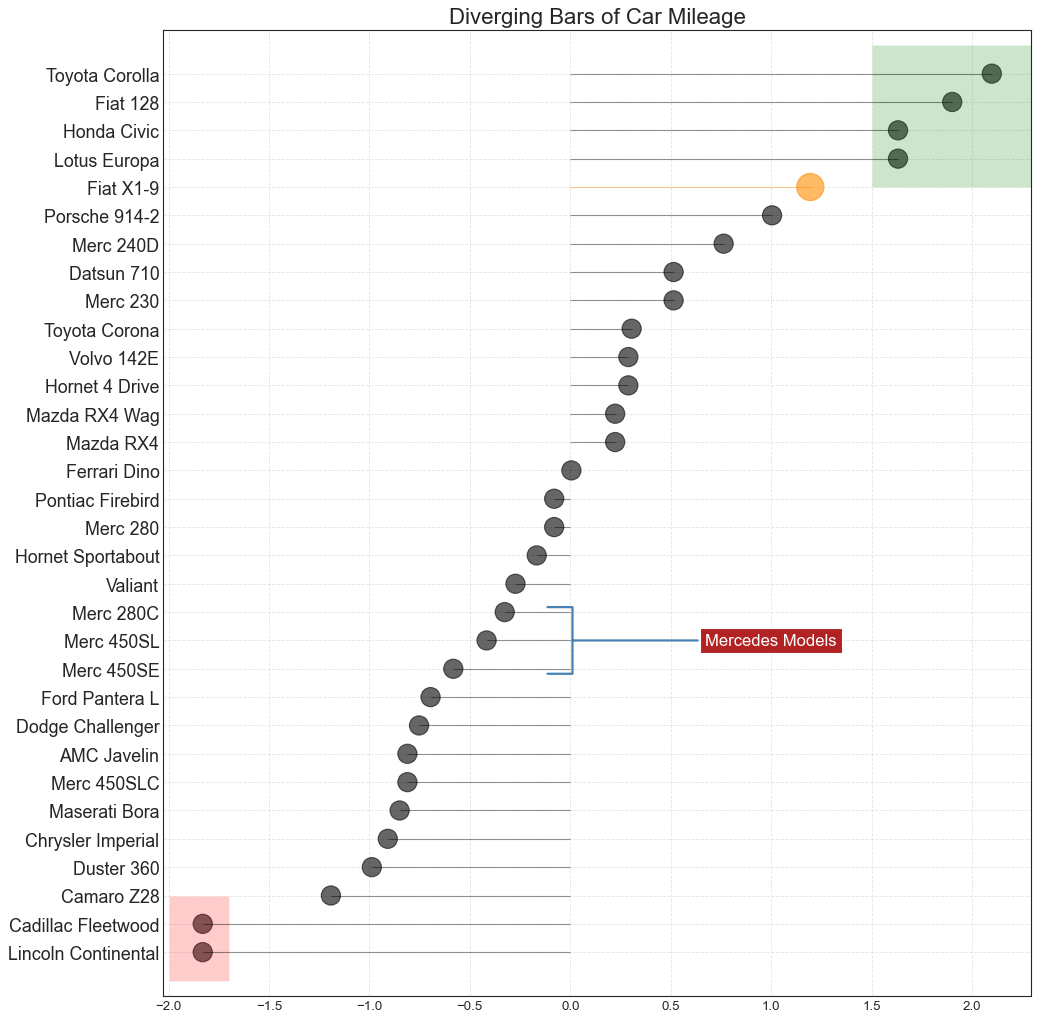

In [176]:
# Prepare Data
df = pd.read_csv('mtcars.csv')

x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw Plot
import matplotlib.patches as patches

plt.figure(figsize=(14,16), dpi=80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# Annotate
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data',
            fontsize=15, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), color='white')

# Add Patches
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()


[Return to Top](#Contents)  
<a id='15'></a>
## 15. Area Chart

By coloring the area between the axis and the lines, the area chart throws more emphasis not just on the peaks and troughs but also the duration of the highs and lows.  The longer the duration of the highs, the larger is the area under the line.

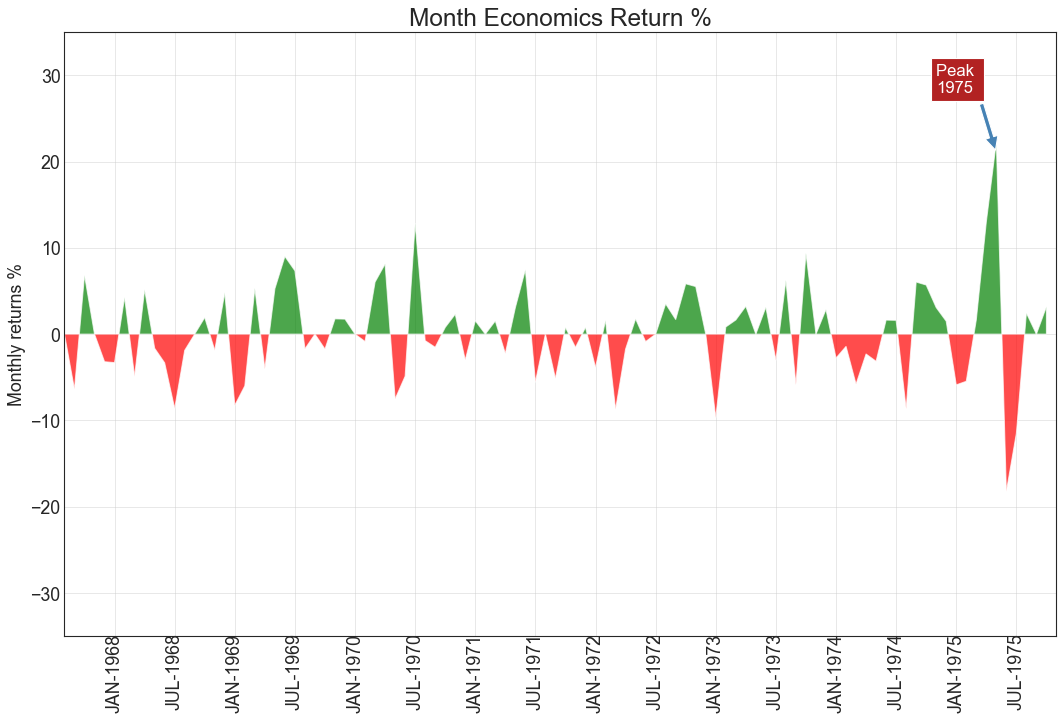

In [196]:
#import numpy as np
#import pandas as pd
import matplotlib.dates as mdates

# Prepare Data

# df = pd.read_csv('https://github.com/selva86/datasets/raw/master/economics.csv', parse_dates=['date']).head(100)
# df.to_csv('economics.csv')
df = pd.read_csv('economics.csv')

x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100

# Plot
plt.figure(figsize=(16,10), dpi=80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')

# Decorations
#xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())] #-MDE didn't work, so:
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(pd.to_datetime(df.date).dt.year, 
                                                          pd.to_datetime(df.date).dt.month_name())]

plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, 
                          fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()

[Return to Top](#Contents)  
# Ranking

<a id='16'></a>
## 16. Ordered Bar Chart

Ordered bar chart conveys the rank order of the items effectively.  But adding the value of the metric above the chart, the user gets the precise information from the chart itself.

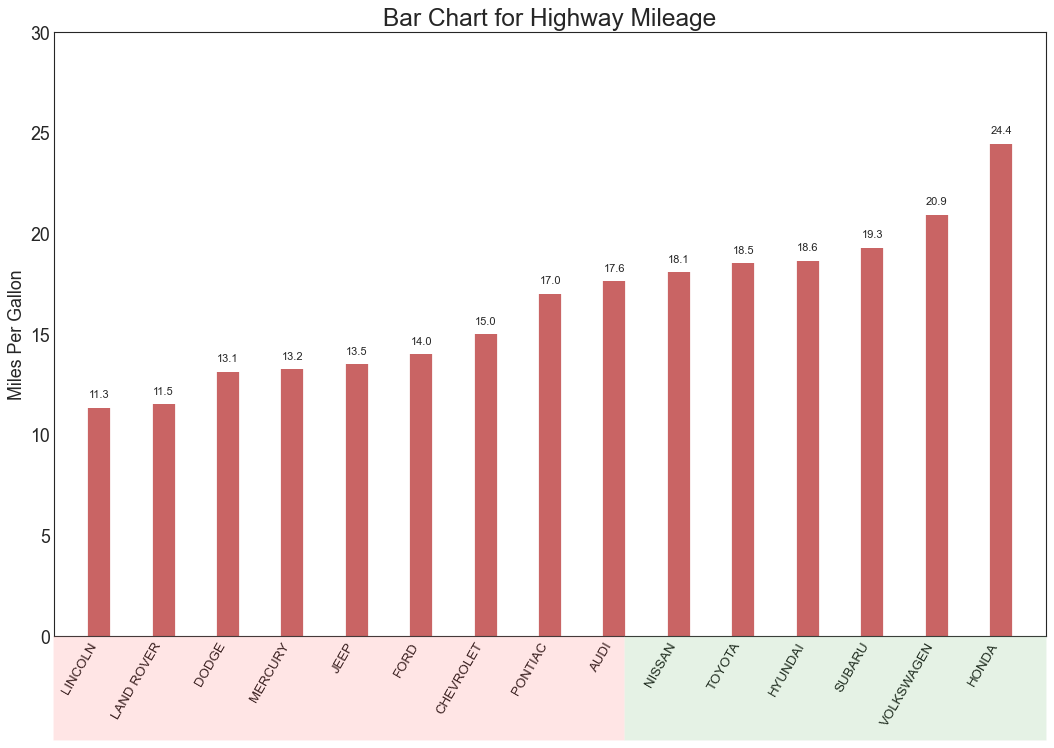

In [197]:
# Prepare Data
#df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw = pd.read_csv('mpg_ggplot2.csv')

df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

[Return to Top](#Contents)  
<a id='17'></a>
## 17. Lollipop Chart

Lollipop chart serves a similar purpose as an ordered bar chart in a visually pleasing way.

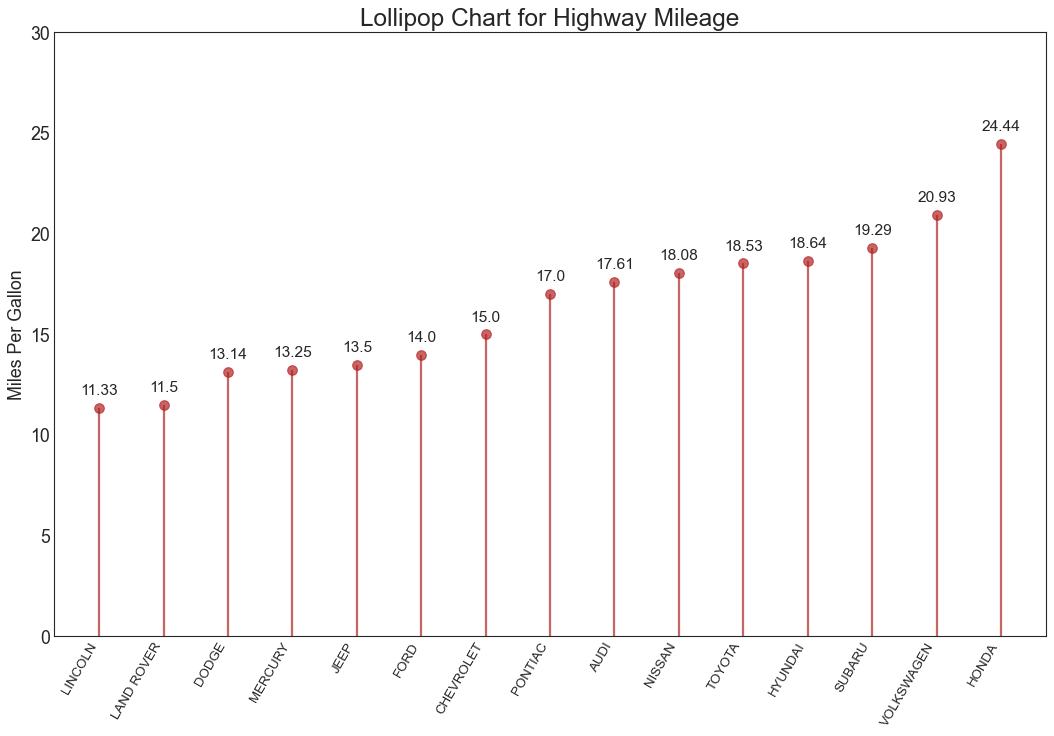

In [199]:
# Prepare Data
#df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw = pd.read_csv('mpg_ggplot2.csv')

df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size':22})
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)

# Annotate
for row in df.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

[Return to Top](#Contents)  
<a id='18'></a>
## 18. Dot Plot

The dot plot conveys the rank order of the items.  And, since it is aligned along the horizontal axis, you can visualize how far the points are from each other more easily.

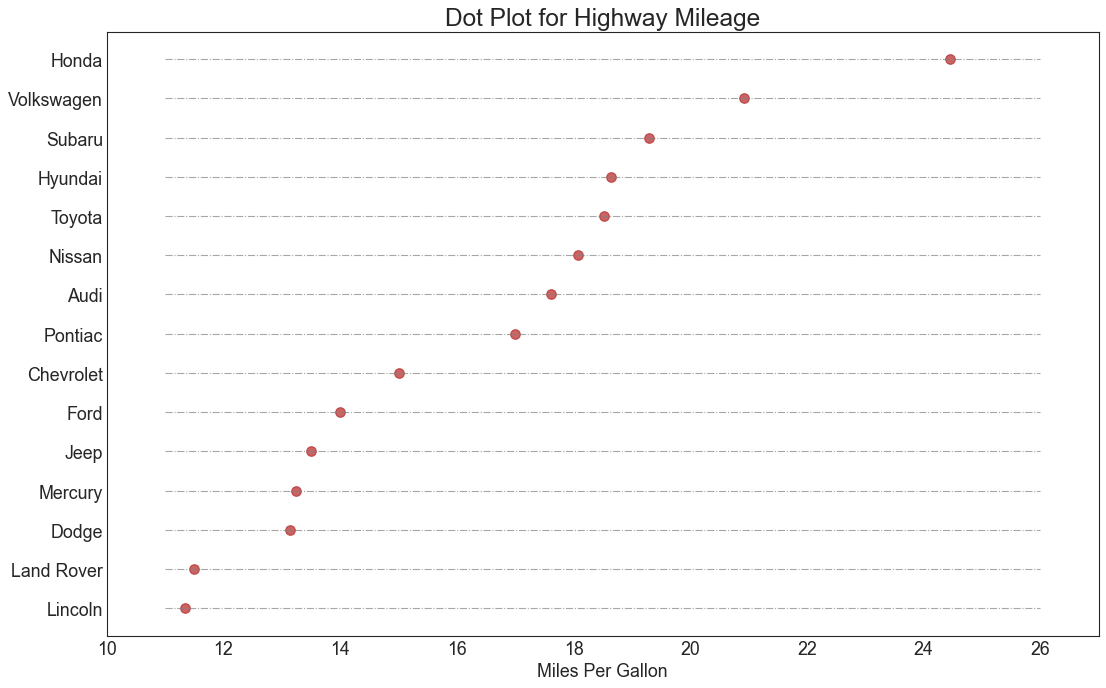

In [212]:
# Prepare Data
#df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw = pd.read_csv('mpg_ggplot2.csv')

df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(10, 27)
plt.show()

[Return to Top](#Contents)  
<a id='19'></a>
## 19. Slope Chart

Slope chart is most suitable for comparing the 'Before' and 'After' positions of a given person/item.

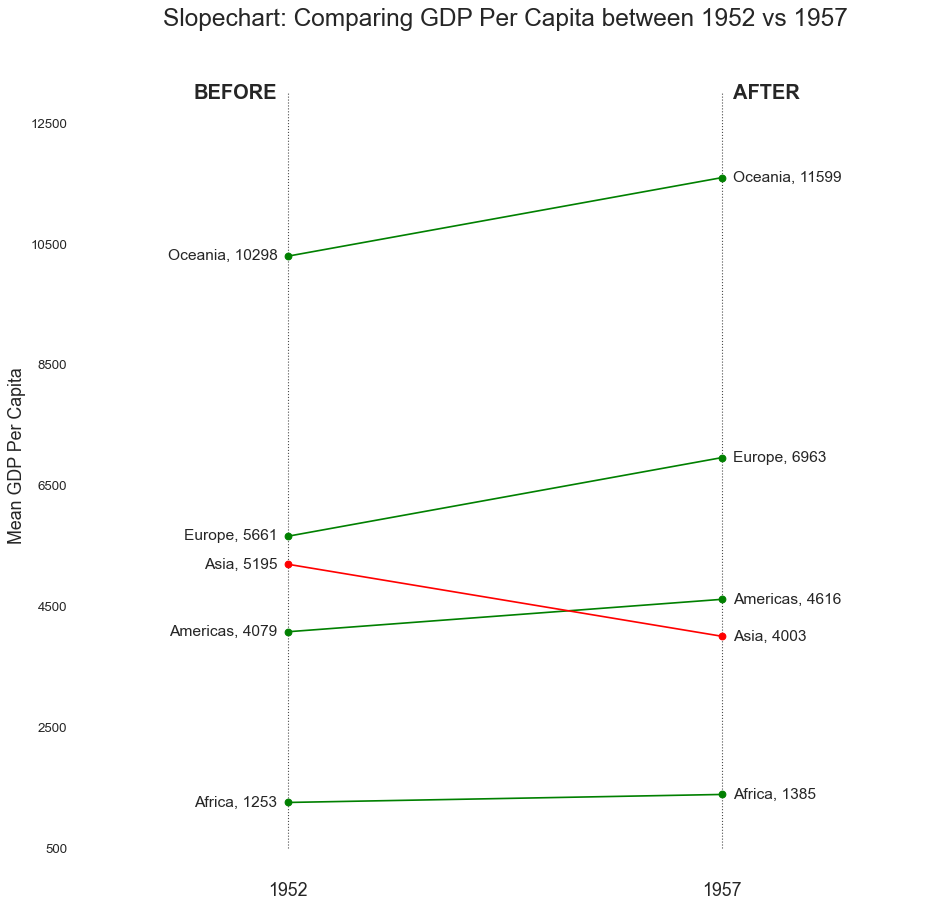

In [215]:
import matplotlib.lines as mlines
# Import Data
#df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")
#df.to_csv('gdppercap.csv')
df=pd.read_csv('gdppercap.csv')

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()


[Return to Top](#Contents)  
<a id='20'></a>
## 20. Dumbbell Plot

Dumbbell plot conveys the 'before' and 'after' positions of various items along with the rank ordering of the items.  Its very useful if you want to visualize the effect of a particular project / initiative on different objects.

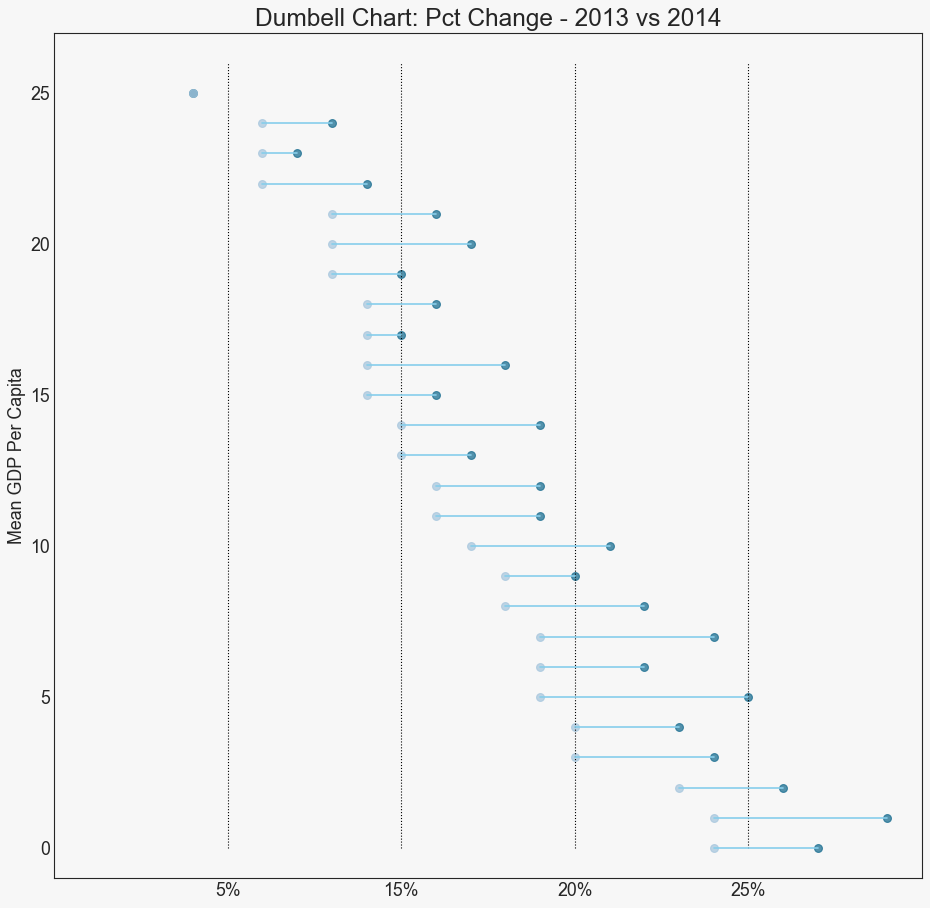

In [219]:
import matplotlib.lines as mlines

# Import Data
#df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")
#df.to_csv('health.csv')
df = pd.read_csv('health.csv')

df.sort_values('pct_2014', inplace=True)
df.reset_index(inplace=True)

# Func to draw line segment
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='skyblue')
    ax.add_line(l)
    return l

# Figure and Axes
fig, ax = plt.subplots(1,1,figsize=(14,14), facecolor='#f7f7f7', dpi= 80)

# Vertical Lines
ax.vlines(x=.05, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.10, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.15, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.20, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['index'], x=df['pct_2013'], s=50, color='#0e668b', alpha=0.7)
ax.scatter(y=df['index'], x=df['pct_2014'], s=50, color='#a3c4dc', alpha=0.7)

# Line Segments
for i, p1, p2 in zip(df['index'], df['pct_2013'], df['pct_2014']):
    newline([p1, i], [p2, i])

# Decoration
ax.set_facecolor('#f7f7f7')
ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014", fontdict={'size':22})
ax.set(xlim=(0,.25), ylim=(-1, 27), ylabel='Mean GDP Per Capita')
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])    
plt.show()


[Return to Top](#Contents)  
# Distribution

<a id='21'></a>
## 21. Histogram for Continuous Variable

Histogram shows the frequency distribution of a given variable.  The below representation gorups the frequency bars based on a categorical variable giving a greater insight about the continuous variable and the categorical variable in tandem.

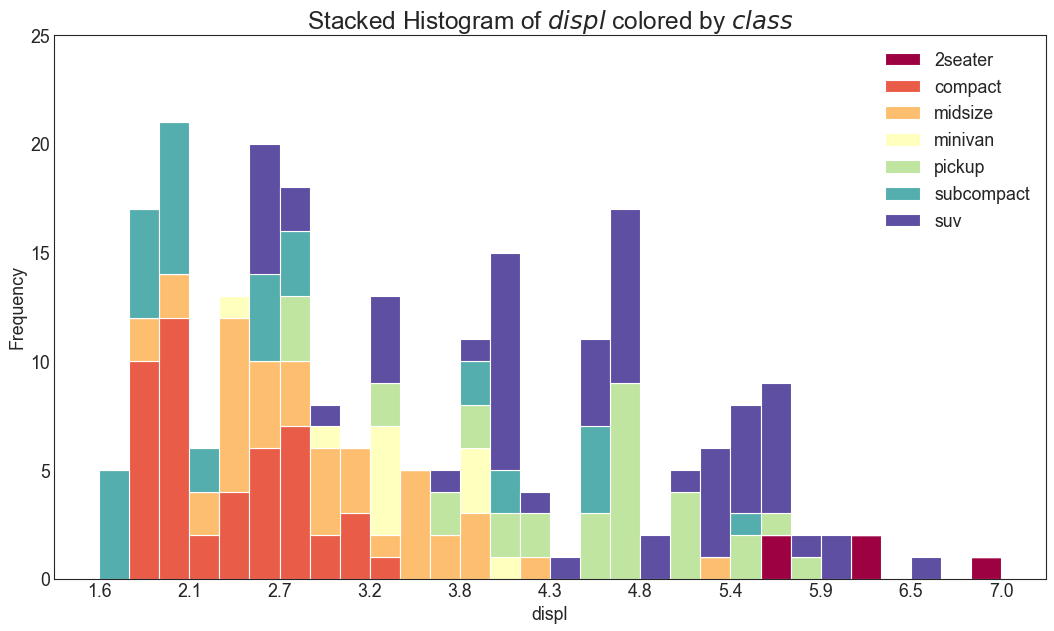

In [221]:
# Import Data
#df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = pd.read_csv('mpg_ggplot2.csv')

# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

[Return to Top](#Contents)  
<a id='22'></a>
## 22. Histogram for Categorical Variable
The histogram of a catgorical variable shows the frequency distribution of that variable.  By coloring the bars, you can visualize the distribution in connection with another categorical variable representing the colors.

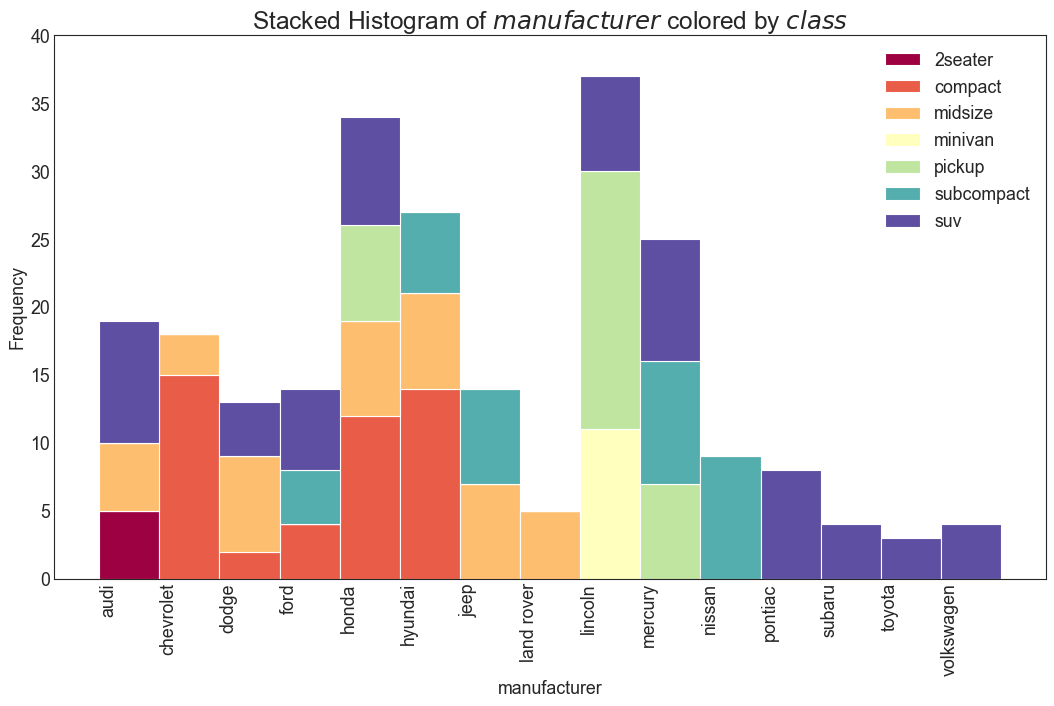

In [222]:
# Import Data
#df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = pd.read_csv('mpg_ggplot2.csv')

# Prepare data
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

[Return to Top](#Contents)  
<a id='23'></a>
## 23. Density Plot
Density plots are a commonly used tool to visualize the distribution of a continuous variable.  By grouping them by the 'response' variable, you can inspect the relationship between the X and the Y.  The below case describes how the distribution of city mileage varies with respect to the number of cylinders.

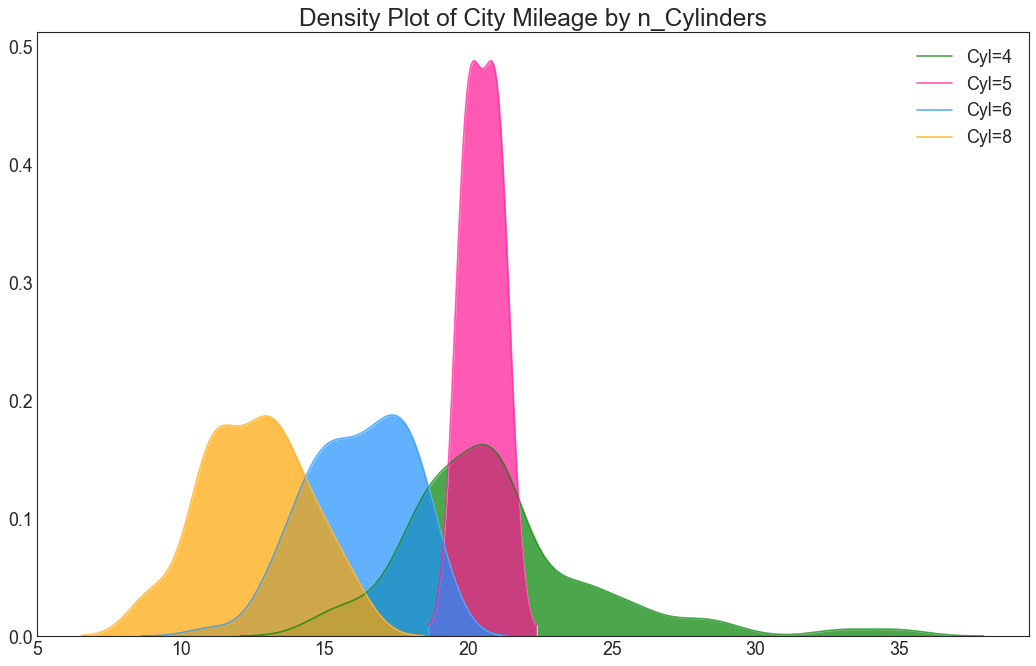

In [223]:
# Import Data
#df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = pd.read_csv('mpg_ggplot2.csv')

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

[Return to Top](#Contents) 
<a id='24'></a>
## 24. Density Curves with Histogram
Density curve with histogram brings together the collective information conveyed by the two plots so you can have them both in a single figure instead of two.

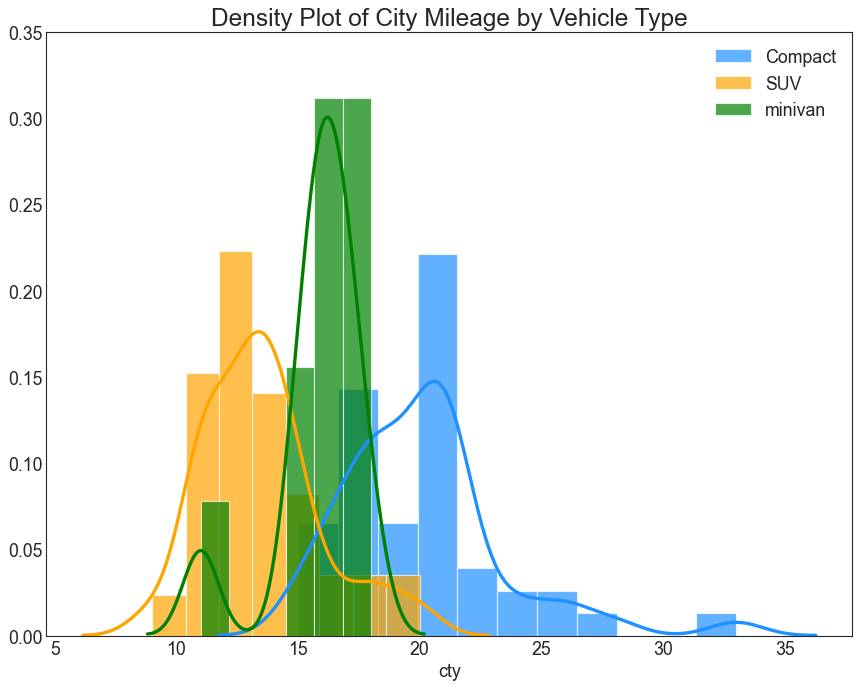

In [224]:
# Import Data
#df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = pd.read_csv('mpg_ggplot2.csv')

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.35)

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.legend()
plt.show()

[Return to Top](#Contents) 
<a id='25'></a>
## 25. Joy Plot
Joy Plot allows the density curves of different groups to overlap.  It is a great way to visualize the distribution of a larger number of groups in relation to each other.  It looks pleasing to the eye and conveys just the right information clearly.  It can be easily built using the `joypy` package, which is based on `matplotlib`.

<Figure size 1280x800 with 0 Axes>

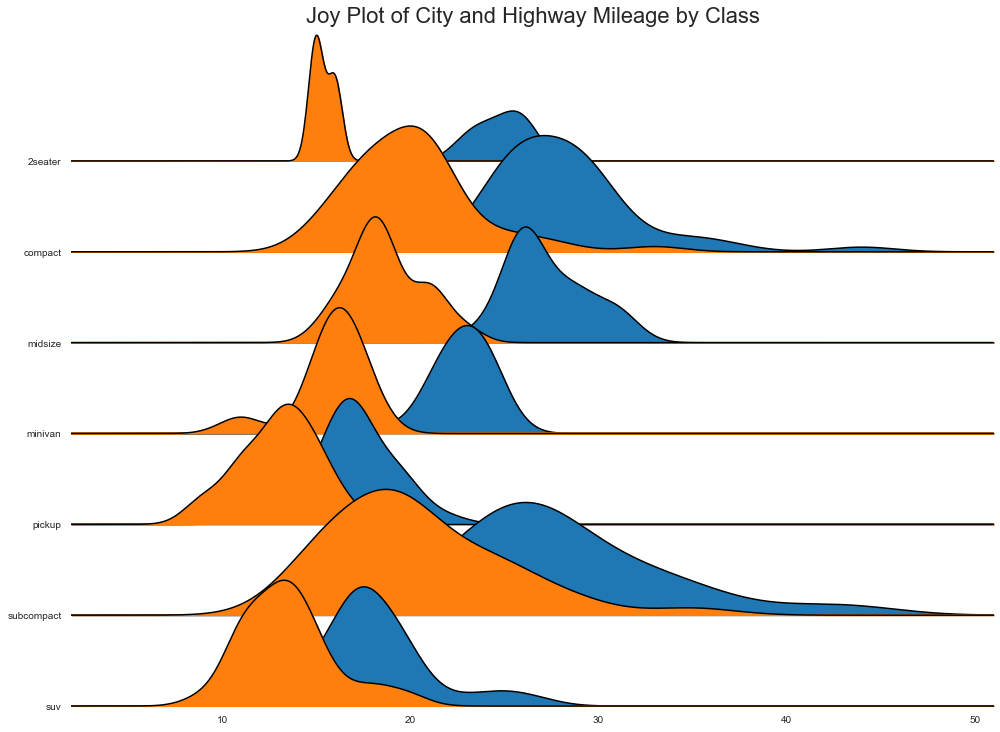

In [227]:
# !pip install joypy
import joypy

# Import Data
#mpg = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
mpg = pd.read_csv('mpg_ggplot2.csv')

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.show()

[Return to Top](#Contents) 
<a id='26'></a>
## 26. Distributed Dot Plot
Distributed Dot Plot shows the univariate distribution of points segmented by groups. The darker the points, more is the concentration of data points in that region.  By coloring the median differently, the real positioning of the groups becomes apparent instantly.

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

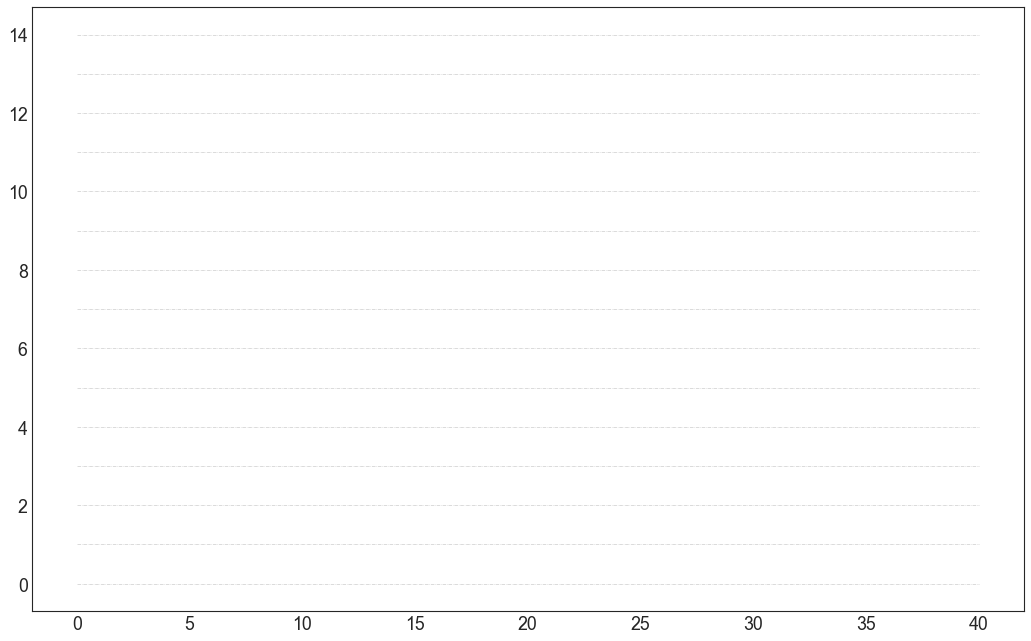

In [230]:
import matplotlib.patches as mpatches

# Prepare Data
#df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw = pd.read_csv('mpg_ggplot2.csv')

cyl_colors = {4:'tab:red', 5:'tab:green', 6:'tab:blue', 8:'tab:orange'}
df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors)

# Mean and Median city mileage by make
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', ascending=False, inplace=True)
df.reset_index(inplace=True)
df_median = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.median())

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=0, xmax=40, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

# Draw the Dots
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer==make, :]
    ax.scatter(y=np.repeat(i, df_make.shape[0]), x='cty', data=df_make, s=75, edgecolors='gray', c='w', alpha=0.5)
    ax.scatter(y=i, x='cty', data=df_median.loc[df_median.index==make, :], s=75, c='firebrick')

# Annotate    
ax.text(33, 13, "$red \; dots \; are \; the \: median$", fontdict={'size':12}, color='firebrick')

# Decorations
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='firebrick', label="Median")
plt.legend(handles=red_patch)
ax.set_title('Distribution of City Mileage by Make', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon (City)', alpha=0.7)
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.set_xlim(1, 40)
plt.xticks(alpha=0.7)
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)   
plt.grid(axis='both', alpha=.4, linewidth=.1)
plt.show()


[Return to Top](#Contents) 
<a id='27'></a>
## 27. Box Plot

[Return to Top](#Contents) 
<a id='28'></a>
## 28. Dot + Box Plot

[Return to Top](#Contents) 
<a id='29'></a>
## 29.Violin Plot

[Return to Top](#Contents) 
<a id='30'></a>
## 30. Population Pyramid

[Return to Top](#Contents) 
<a id='31'></a>
## 31. Categorical Plots

[Return to Top](#Contents) 
# Composition
<a id='32'></a>
## 32. Waffle Chart

[Return to Top](#Contents) 
<a id='33'></a>
## 33. Pie Chart

[Return to Top](#Contents) 
<a id='34'></a>
## 34. Treemap

[Return to Top](#Contents) 
<a id='35'></a>
## 35. Bar Chart

[Return to Top](#Contents) 
# Change
<a id='36'></a>
## 36. Time Series Plot

[Return to Top](#Contents) 
<a id='37'></a>
## 37. Time Series with Peaks and Troughs Annotated

[Return to Top](#Contents) 
<a id='38'></a>
## 38. Autocorrelation Plot

[Return to Top](#Contents) 
<a id='39'></a>
## 39. Cross Correlation Plot

[Return to Top](#Contents) 
<a id='40'></a>
## 40. Time Series Decomposition Plot

[Return to Top](#Contents) 
<a id='41'></a>
## 41. Multiple Time Series

[Return to Top](#Contents) 
<a id='42'></a>
## 42. Plotting with different scales using secondary Y axis

[Return to Top](#Contents) 
<a id='43></a>
## 43. Time Series with Error Bands

[Return to Top](#Contents) 
<a id='44'></a>
## 44. Stacked Area Chart

[Return to Top](#Contents) 
<a id='45'></a>
## 45. Area Chart Unstacked

[Return to Top](#Contents) 
<a id='46'></a>
## 46. Calendar Heat Map

[Return to Top](#Contents) 
<a id='47'></a>
## 47. Seasonal Plot

[Return to Top](#Contents) 
# Groups
<a id='48'></a>
## 48. Dendrogram

[Return to Top](#Contents) 
<a id='49'></a>
## 49. Cluster Plot

[Return to Top](#Contents) 
<a id='50'></a>
## 50. Andrews Curve

[Return to Top](#Contents) 
<a id='51'></a>
## 51. Parallel Coordinates


[Return to Top](#Contents) 